##IMDB MOVIE REVIEW CLASSIFICATION

This is the replicaiton of the movie review sentiment classification using fast ai. The actual code can be refered in this link 
https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-imdb.ipynb


![alt text](https://drive.google.com/uc?export=view&id=1vtSCNUN3Oq5gOGyLrvWyKV09kqbxWx2j)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.text import *

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [ ]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [ ]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [ ]:
data_lm.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [ ]:
data_lm.save()

In [ ]:
# Tokenization and Numericalization
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [ ]:
# show the 1st 10 tokens. 
data.vocab.itos[0:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [ ]:
data.train_ds[0]


(Text xxbos xxmaj this show is unbelievable in that . . . what it xxunk and what it focuses on and . . . words can not describe how insane xxup et is . xxmaj they will report anything . xxmaj if a celebrity is even remotely xxunk connected to the story xxup et will report on it . xxmaj if a dog poop in the xxmaj tom xxmaj cruise 's yard they will report on it . xxmaj if a celebrity dies . . . they will talk about it for weeks on end to the point where the public xxunk that celebrity . xxmaj if a celebrity is on trial . . . xxup et will report it for xxup months on end . xxmaj there is no end to what this show will reports and no time frame that xxunk how long they will focus on a story . xxmaj is it even considered xxunk reporting ? xxmaj the reports are so xxunk annoying too , with harsh rambling voices and end with an unnecessary xxunk to convey a sense of important . i can not watch this show without questioning humanity 's existence . xxup et is one big reason i avoid pre - evening

In [ ]:
#Using DataBlock API to play with the data

data = TextList.from_csv(path, 'texts.csv').split_from_df(col=2).label_from_df(cols=0).databunch()

In [ ]:
data.show_batch()

text,target
xxbos negative,negative
xxbos positive,positive
xxbos negative,negative
xxbos positive,positive
xxbos positive,positive


In [ ]:
# Language model
bs = 48

path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/unsup')]

In [ ]:
(path/'train/pos').ls()[0:10]

[PosixPath('/root/.fastai/data/imdb/train/pos/5918_9.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/11261_9.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/5010_10.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/11383_7.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/6712_9.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/6631_7.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/5549_8.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/2159_10.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/6931_8.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/1428_7.txt')]

In [ ]:
data_lm = TextList.from_folder(path).filter_by_folder(include=['train','test','unsup']).split_by_rand_pct(0.1).label_for_lm().databunch(bs=bs)

In [ ]:
data_lm.show_batch()
data_lm.save('data_lm.pkl')

idx,text
0,"like xxmaj the xxmaj shaw shank redemption , the godfather , and xxmaj american history xxup x. i can like good movies in a genre like horror , or comedy , even if the movie might not be that great . i can even enjoy a bad movie that just happens to entertain me ( xxmaj bloodsport ) . i also will try to rate movie fairly even if i"
1,"in much other films and their bios are all but non existent , so you can imagine i was surprised to find xxmaj giovanni xxmaj lombardo xxmaj radice in this movie who was in xxmaj scorsese 's xxmaj gangs of xxmaj new xxmaj york . xxmaj now xxmaj lt . xxmaj rizzo looked familiar and i found he was in the 2002 movie xxmaj spiderman as a very tiny role"
2,"with it by being honest about it , and by growing as an actor , not by hiding it with carefully chosen camera angles and floor length robes . \n \n xxmaj so i ca n't really tell what 's going on , and the movie does n't give me a reason to care about what 's going on , and the protagonist is completely one dimensional and visually"
3,"at xxunk for me . xxmaj this may seem odd , but i highly recommend it . xxmaj it 's something you have to see for yourself ... but do n't say i did n't warn you . i do n't think this review could get any more precise so i 'm done now . \n \n xxbos xxmaj dr. xxmaj xxunk wants to save his son xxmaj julio"
4,"microscopic budget . xxmaj the production values are low , but the filmmakers were smart enough to not be ambitious . xxmaj little in the way of special props or shooting locations were needed . xxmaj the acting is especially weak and there is virtually nothing original in the screenplay . xxmaj on the positive side , the special makeup effects are surprisingly good by low budget film standards ."


In [ ]:
print(len(data_lm.train_ds))

path.ls()

90000


[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/unsup')]

In [ ]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM,drop_mult=0.3)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


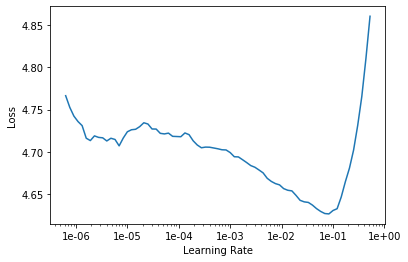

In [ ]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1,1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.163372,4.028653,0.295177,48:34


In [ ]:
learn.save('first_head')

In [ ]:
learn.load('first_head');

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2,1e-3,moms=(0.8,0.7)) # should have run 10 epochs but takes more time. so limiting to 2 epochs. 
learn.save('fine_tuned')

epoch,train_loss,valid_loss,accuracy,time
0,3.844707,3.787398,0.323246,54:42
1,3.705748,3.694169,0.334929,54:39


In [ ]:

learn.load('fine_tuned');

In [ ]:
TEXT = "I liked this movie because"
N_WORDS = 60
N_SENTENCES = 1

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it reminded me of The Godfather and the Godfather . The Godfather is a very good film . The message was very good . It had a very good script and it was n't too bad . The performances were good but the story felt like there was n't much to it


In [ ]:
learn.save_encoder('fine_tuned_enc')

CLASSIFIER

In [ ]:
path = untar_data(URLs.IMDB)

In [ ]:
(path/'train/pos').ls()[0:10]

[PosixPath('/root/.fastai/data/imdb/train/pos/5557_9.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/8308_7.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/9501_10.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/2678_8.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/8130_10.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/6484_10.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/3519_7.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/7598_10.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/8624_7.txt'),
 PosixPath('/root/.fastai/data/imdb/train/pos/12126_8.txt')]

In [ ]:
data_lm.voc

In [ ]:
data_clas = (TextList.from_folder(path,vocab=data_lm.vocab).split_by_folder(valid='test').label_from_folder(classes=['neg','pos']).databunch(bs=bs))

In [ ]:
data_clas.save('data_clas.pkl')

In [ ]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxunk ) is the developing world 's answer to xxmaj silence of the xxmaj lambs . xxmaj where ` xxmaj silence ' terrorized our peace of mind , ` xxmaj citizen ' exhausts and saddens us instead . xxmaj this dramatization of the xxmaj chikatilo case translates rather well , thanks to a xxmaj westernized friendship between two xxmaj rostov cops who become equals . \n \n citizenx",pos
"xxbos xxmaj god ! xxmaj zorro has been the the subject of about as many movies as xxmaj tarzan , and probably had about as many actors in the title role . \n \n xxmaj this xxmaj serial is one of my own personal favourites , and as previously stated , it is one of the xxmaj top 5 xxmaj sound xxmaj serials . xxmaj oddly enough , this",pos
"xxbos xxmaj now that xxmaj xxunk ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both hosts of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",neg
"xxbos xxup oliver xxup twist was to have controversy as well as success following it after xxmaj dickens published it in 1837 . xxmaj his picture of life in the urban ghettos was something shocking and new , and his making the central figures of the novel include criminals was another innovation . \n \n xxmaj one day he was walking in xxmaj london and passed a young woman",pos


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj this sleek , sexy movie is a must - see . xxmaj only upon multiple viewings can one truly understand the uniqueness of this film . xxmaj personally i enjoy the narrator for his intelligent , no subject left untouched , style of narration . xxmaj the introduction grips you right away , and holds you at the edge of your seat throughout the film . xxmaj he provides wonderful insight into the world of the xxunk and allows the audience to really ' connect ' with internal horror this film exhibits . xxmaj the script itself holds the movie together wonderfully . xxmaj not only for kids , but the elderly alike will gain a higher understanding of the xxunk and the modern grasp that they have on the sexual experience . xxmaj ahead of its time and groundbreaking in cinematography , it surely defines the word ' masterpiece ' .,xxbos i have seen bad films but this took the xxunk xxmaj made no sense , and all 

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


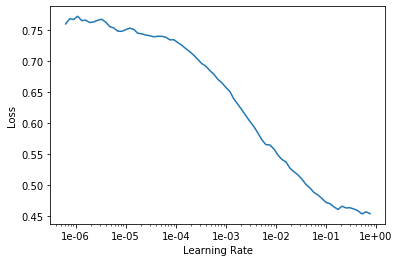

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.266510,0.203926,0.918040,04:56


In [ ]:
learn.save('first')
learn.load('first');

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.243289,0.188978,0.928320,05:11


In [ ]:
learn.save('second');
learn.load('second');

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.228387,0.167952,0.936160,09:40
1,0.174055,0.162770,0.937640,08:40


In [ ]:
learn.predict("I really love this movie, it is awesome")

(Category pos, tensor(1), tensor([1.0353e-04, 9.9990e-01]))

In [ ]:
learn.predict('I would love this movie but I felt the actor was lousy')

(Category neg, tensor(0), tensor([0.9600, 0.0400]))

![alt text](https://drive.google.com/uc?export=view&id=1yKNhva7Roi-G3mkG9jnLlU_y1G3Bc3Ix)
